<a href="https://colab.research.google.com/github/Danie110001001109192912/Cancer_prediction/blob/main/lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lung Cancer Prediction

Lung cancer is the leading cause of cancer death worldwide, accounting for 1.59 million deaths in 2018. The majority of lung cancer cases are attributed to smoking, but exposure to air pollution is also a risk factor. A new study has found that air pollution may be linked to an increased risk of lung cancer, even in nonsmokers.

The study, which was published in the journal Nature Medicine, looked at data from over 462,000 people in China who were followed for an average of six years. The participants were divided into two groups: those who lived in areas with high levels of air pollution and those who lived in areas with low levels of air pollution.

The researchers found that the people in the high-pollution group were more likely to develop lung cancer than those in the low-pollution group. They also found that the risk was higher in nonsmokers than smokers, and that the risk increased with age.

While this study does not prove that air pollution causes lung cancer, it does suggest that there may be a link between the two. More research is needed to confirm these findings and to determine what effect different types and levels of air pollution may have on lung cancer risk

Importing libery

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

Dowloading datasets


In [2]:
kjson = pd.read_json('/content/drive/MyDrive/Colab Notebooks/kaggle.json', typ = 'series')

os.environ['KAGGLE_USERNAME'] = 'danielduarte2423421'
os.environ['KAGGLE_KEY'] = kjson.key

! kaggle datasets download --force thedevastator/cancer-patients-and-air-pollution-a-new-link
# what exacly this command works ?
# https://www.kaggle.com/code/rajputmonalharising/lung-cancer-prediction

  0% 0.00/7.36k [00:00<?, ?B/s]
100% 7.36k/7.36k [00:00<00:00, 11.6MB/s]


In [3]:
pasc = pd.read_csv('/content/cancer-patients-and-air-pollution-a-new-link.zip')

In [4]:
pasc.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
pasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
pasc.duplicated().sum()

0

In [7]:
pasc['Patient Id'].duplicated().sum()

0

<ipython-input-30-c5089d5e9a1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlação = pasc.corr()


<Axes: >

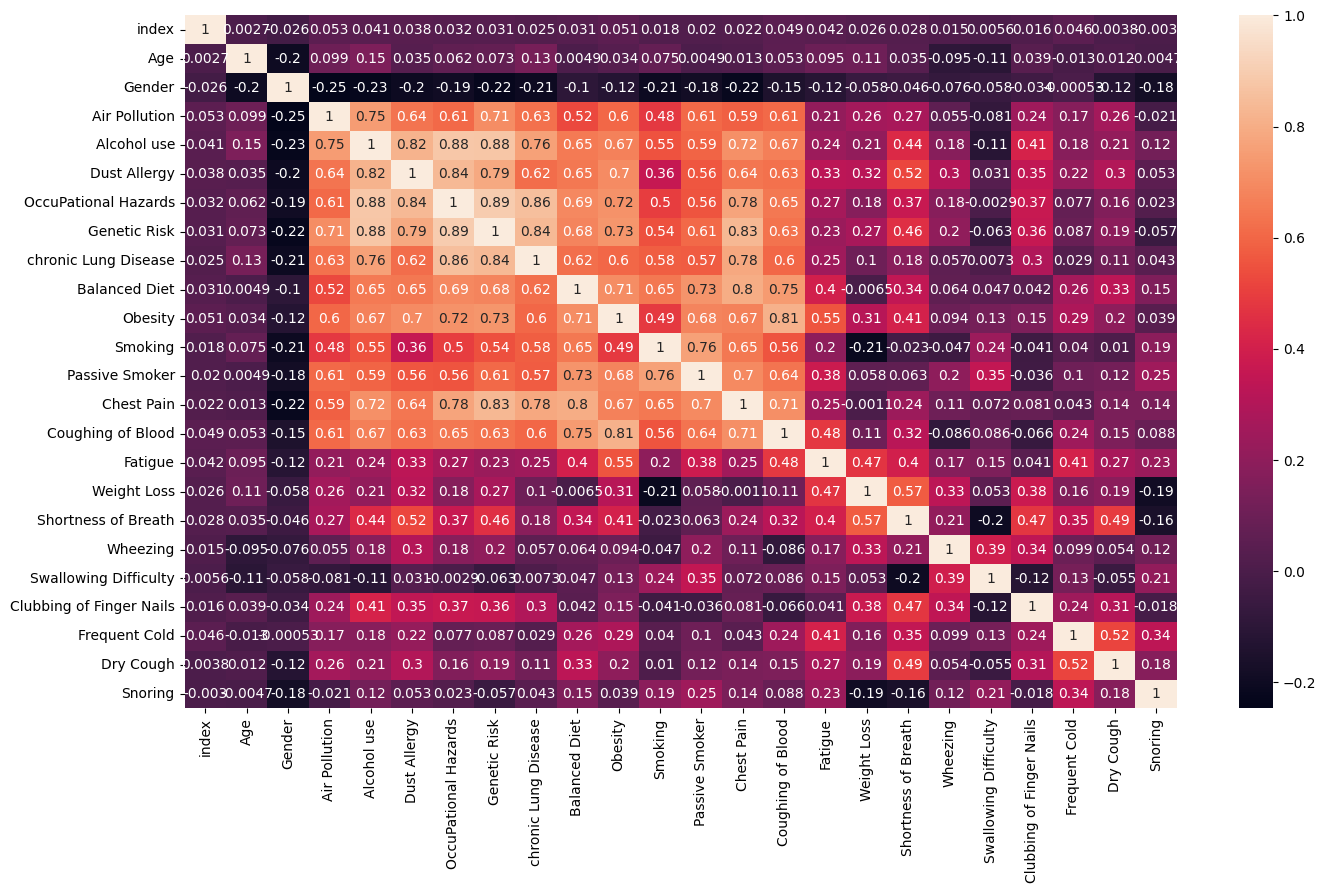

In [30]:
correlação = pasc.corr()
plt.figure(figsize = (16, 9))
sns.heatmap(correlação, annot= True)

<Axes: >

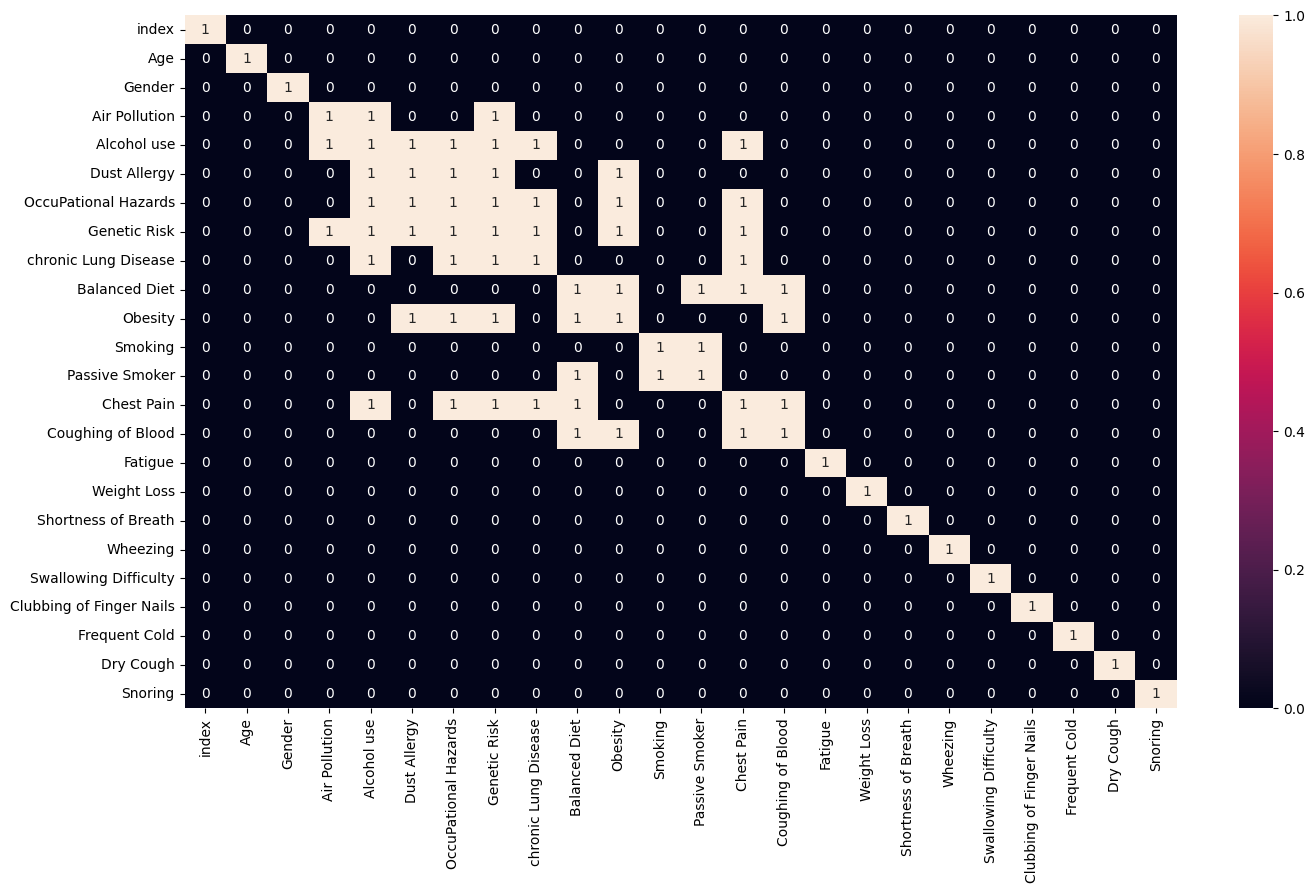

In [31]:
cor_alta = correlação >= 0.7
plt.figure( figsize = (16,9))
sns.heatmap(cor_alta, annot= True)

In [10]:
corr_07 = ['Level', 'Alcohol use',
          'OccuPational Hazards', 'Genetic Risk', 'Chest Pain', 'chronic Lung Disease', 'Air Pollution']

<Figure size 1600x900 with 0 Axes>

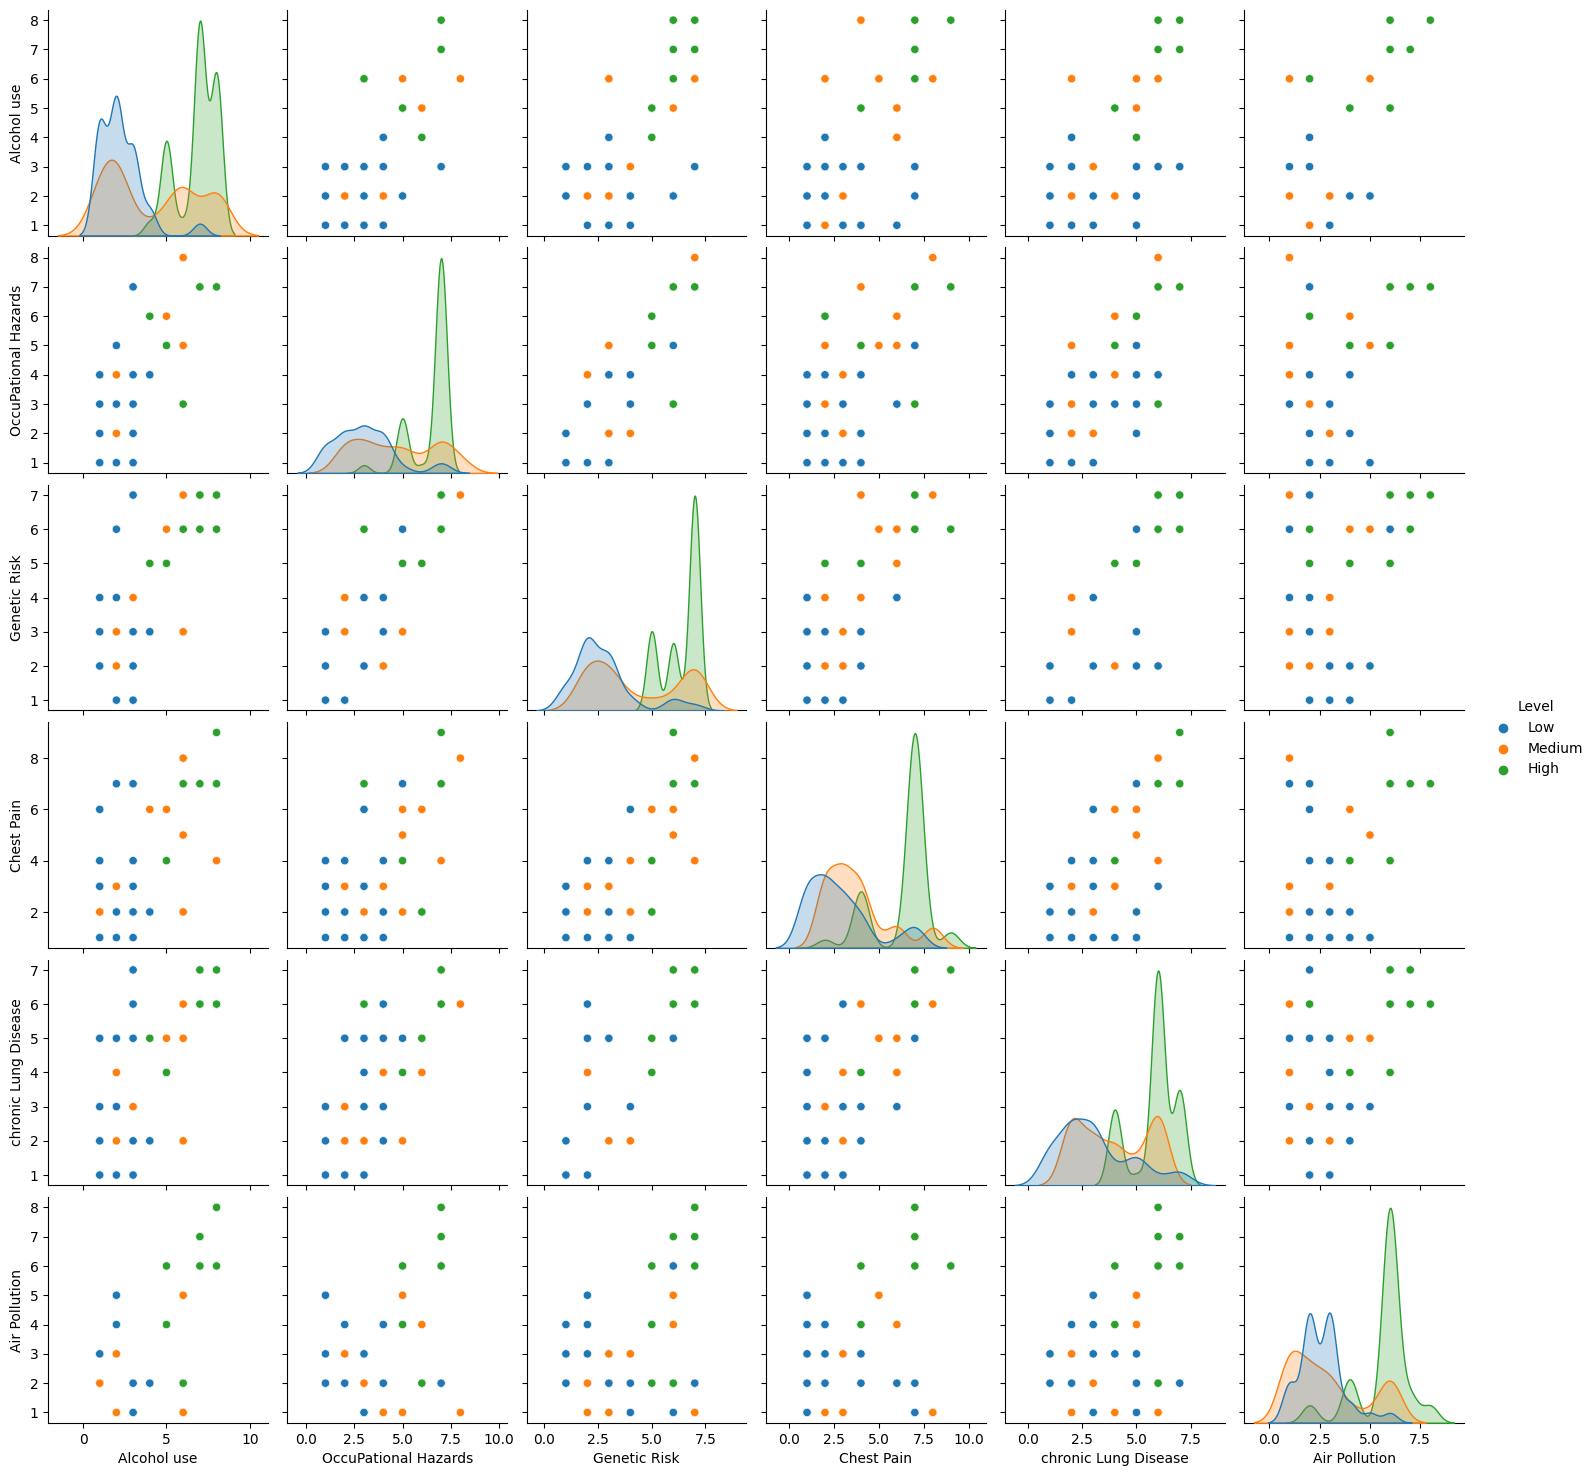

In [32]:
plt.figure( figsize = (16,9))
sns.pairplot(data = pasc[corr_07], hue = 'Level')
plt.show()

<Figure size 1600x1000 with 0 Axes>

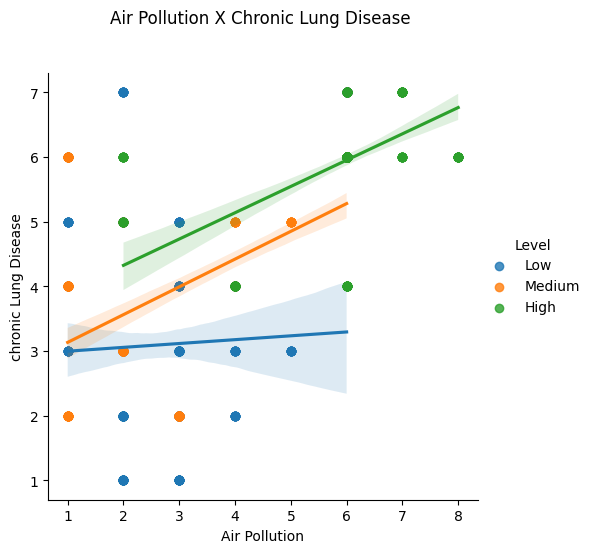

<Figure size 1600x1000 with 0 Axes>

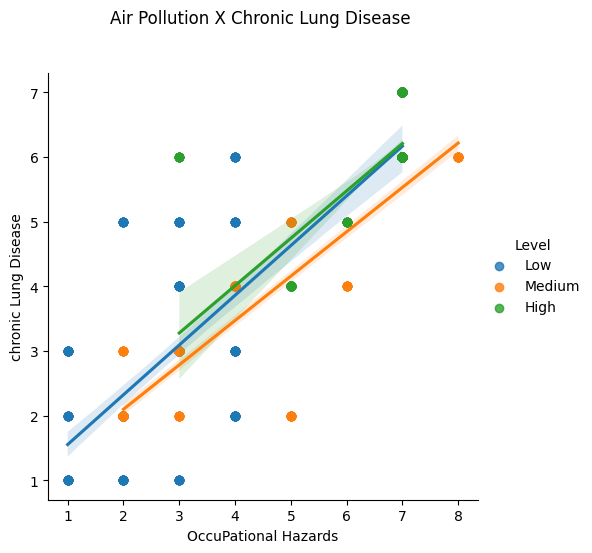

<Figure size 1600x1000 with 0 Axes>

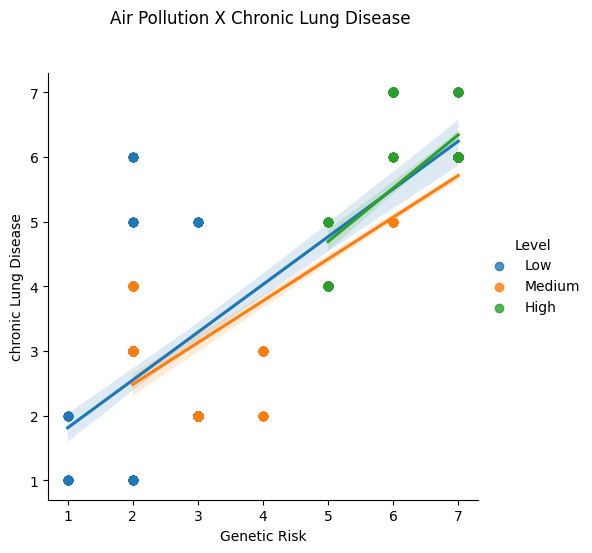

<Figure size 1600x1000 with 0 Axes>

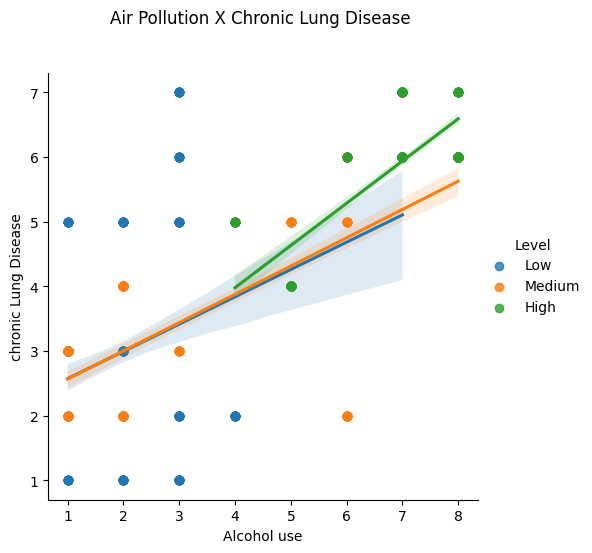

In [36]:
plt.figure(figsize = (16,10))

sns.lmplot(data = pasc, y = 'chronic Lung Disease', x = 'Air Pollution', hue = 'Level')
plt.title('Air Pollution X Chronic Lung Disease \n\n')
plt.show()

# mostrar esses graficos melhor
# buscar atalho para ir apenas ao final da linha e perto das teclas que eu ja digito
# ver a rela;'ao entre as variaveis de maior correla'ao
# ver a distribui'ao delas e box olt

plt.figure(figsize = (16,10))

sns.lmplot(data = pasc, y = 'chronic Lung Disease', x = 'OccuPational Hazards', hue = 'Level')
plt.title('Air Pollution X Chronic Lung Disease \n\n')
plt.show()

plt.figure(figsize = (16,10))

sns.lmplot(data = pasc, y = 'chronic Lung Disease', x = 'Genetic Risk', hue = 'Level')
plt.title('Air Pollution X Chronic Lung Disease \n\n')
plt.show()

plt.figure(figsize = (16,10))

sns.lmplot(data = pasc, y = 'chronic Lung Disease', x = 'Alcohol use', hue = 'Level')
plt.title('Air Pollution X Chronic Lung Disease \n\n')
plt.show()

In [ ]:
# prompt: Faca motrar 2 graficos diferentes na mesma saida lado a lado com plt.subplots

plt.subplots(1, 2, figsize=(16, 10))

sns.lmplot(data=pasc, y='chronic Lung Disease', x='Air Pollution', hue='Level')
plt.title('Air Pollution X Chronic Lung Disease \n\n')

sns.lmplot(data=pasc, y='Chest Pain', x='Air Pollution', hue='Level')
plt.title('Air Pollution X Chest Pain \n\n')

plt.show()
